# Kernal SVM

In [9]:
import sys
import os

current_dir = os.path.abspath('')

src_dir = os.path.join(current_dir, '..', '..', 'src')

sys.path.append(src_dir)

import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from utils.plotDecisionRegions import plot_decision_regions

### Create noisy non-linearly separable data

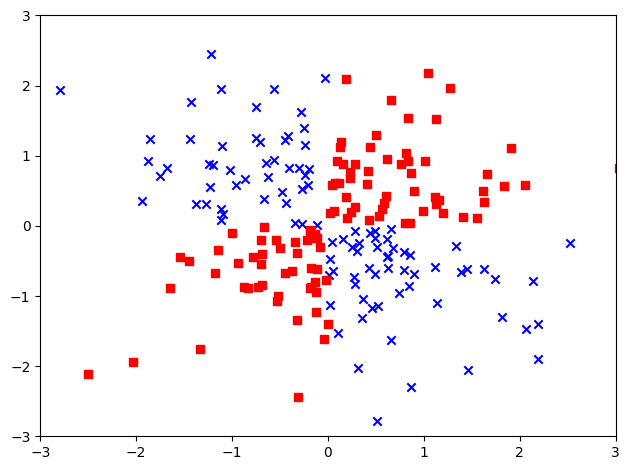

In [3]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.tight_layout()
plt.show()

/Users/brandonfeist/git/ml/python-machine-learning-book/notebooks/classification/../../src/utils/plotDecisionRegions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


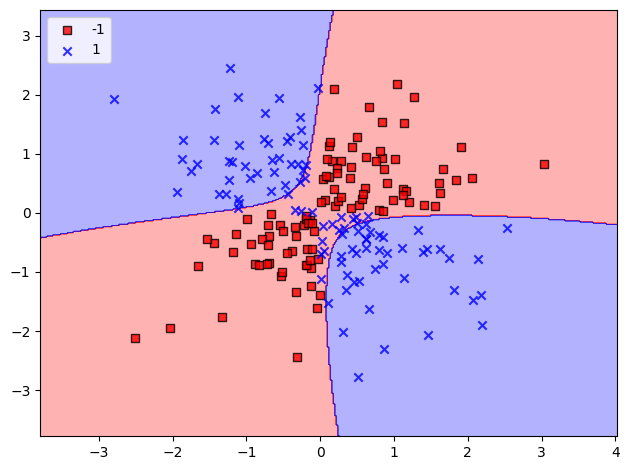

In [5]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### RBF on Iris Dataset

In [11]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # Grab second and third features (petal length and petal width)
y = iris.target

print('Class labels:', np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # 30% test data & 70% training data
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


/Users/brandonfeist/git/ml/python-machine-learning-book/notebooks/classification/../../src/utils/plotDecisionRegions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


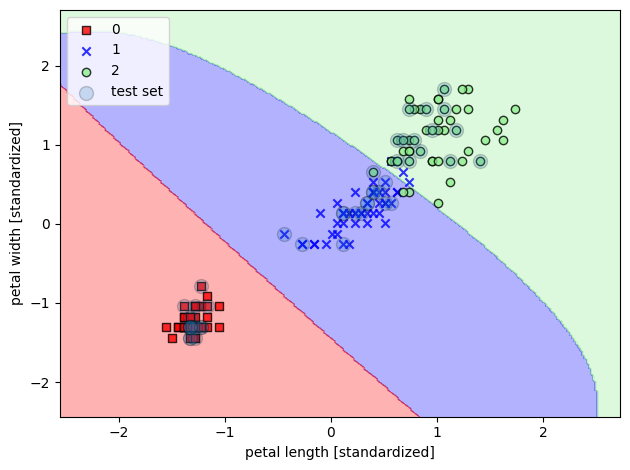

In [13]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Adding a Large Gamma Value

/Users/brandonfeist/git/ml/python-machine-learning-book/notebooks/classification/../../src/utils/plotDecisionRegions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


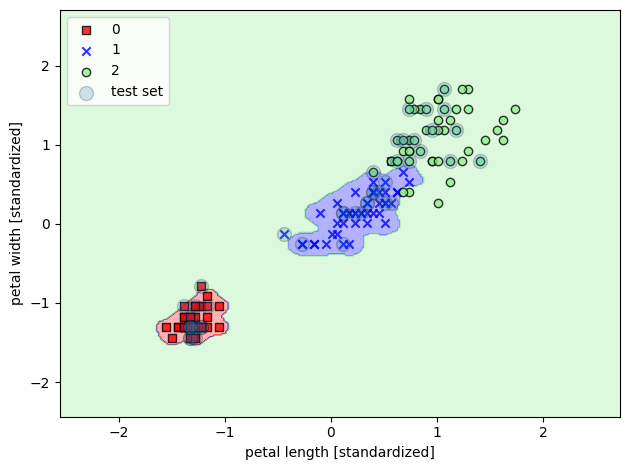

In [14]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

As you can see, by increasing the gamma value we can create a bumpier more defiend decision boundary. But this comes at the cost of losing generality and overfitting the data due to high variance. Tuning the gamma hyperparameter is crucial to achieving a good fit.

# Learnings
Kernal SVM helps us create a linear decision boundary on none linear data by increasing the dimensionality of the data. By increasing the dimensionality $ϕ$, it allows us to create hyperplanes in that higher dimension that seperate the data. When we project that higher dimension back down to the original dimension $ϕ^{-1}$, we get a non-linear decision boundary.

### Kernal Trick
The book does not go too in depth into the training process of the Kernal SVM, so it's hard to know exactely how the kernal trick comes into play here. I do know that the kernal trick is a way to calculate the distance between two input vectors without having to transform the vectors to a higher dimensional space, which can be costly computationaly. It appears the kernal trick is still a bit costly, as it compares every vector with eachother, making the time complexity $O(n^2)$. The kernal trick appears to be a part of a larger minimization function that is used to find the optimal hyperplane in the higher dimensional space.

The kernal trick is a smaller part of a larger optimization function that the book does not appear to go too deeply into $\min_{\alpha} \left( \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y^{(i)} y^{(j)} k(x^{(i)}, x^{(j)}) - \sum_{i=1}^n \alpha_i \right)$ where $Q_{ij} = y^{(i)} y^{(j)} k(x^{(i)}, x^{(j)})$ and contains the kernal trick. I'm not 100% sure about this, but it appears the Kernal SVM uses Lagrange Multipliers ($\alpha$) to solve this optimization problem instead of standard weights like logistic regression. But there seem to be a few key differences, $\alpha$ plays the role of determining the position and orientation of the hyperplane, and each training example seems to have its own $\alpha$ value. A non-zero $\alpha$ would indicate that the related input vector is a support vector. These support vectors are then used to calculate the decision boundary.

The decision function after determining each $\alpha$ value is $f(x) = \text{sgn}\left(\sum_{i=1}^n \alpha_i y^{(i)} k(x^{(i)}, x) + b\right)$, where $b$ is the bias term, and $sgn$ is the sign function that determines if an input classifies as a positive or negative class. Seeing the decision function makes it clear how $\alpha$ plays a role in this. Essentially any vectors with an $\alpha$ close to 1 have a large impact on the summation of the decision function as they are support vectors. The $\alpha$ values that are close to zero have little to no impact.

I feel like I have a rough understanding that the book does not really go into too much, but I feel like there's still a lot of work I could do to understand this better.